In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
#setting a seed to ensure reproducibility

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
data = pd.read_csv("simulated_symptom_data.csv")

symptom_data = data.drop(columns=['Age', 'SymptomCount_T1', 'FullPersistence']) #columns for L-VAE

#split dataset into t1 and t2

df_t1 = symptom_data.iloc[:, :12]  #symptoms at timepoint 1
df_t2 = symptom_data.iloc[:, 12:]  #symptoms at timepoint 2

In [5]:
def jaccard_similarity(df):
    n = df.shape[1]
    sim_matrix = np.zeros((n, n))
    columns = df.columns

    for i in range(n):
        for j in range(n):
            a = df.iloc[:, i]
            b = df.iloc[:, j]
            intersection = np.logical_and(a, b).sum()
            union = np.logical_or(a, b).sum()
            sim_matrix[i, j] = intersection / union if union != 0 else 0.0

    cleaned_columns = [col.replace('_T1', '').replace('_T2', '') for col in columns]
    
    return pd.DataFrame(sim_matrix, index=cleaned_columns, columns=cleaned_columns)


#df_1 should be a binary dataframe (0s and 1s) with symptoms as columns- without demographics
jaccard_matrix_t1 = jaccard_similarity(df_t1)
print(jaccard_matrix_t1.round(3))

jaccard_matrix_t2 = jaccard_similarity(df_t2)
print(jaccard_matrix_t2.round(3))

                     Fever  Muscle ache  Fatigue  Sore throat  Cough  \
Fever                1.000        0.337    0.331        0.252  0.314   
Muscle ache          0.337        1.000    0.463        0.299  0.379   
Fatigue              0.331        0.463    1.000        0.322  0.448   
Sore throat          0.252        0.299    0.322        1.000  0.326   
Cough                0.314        0.379    0.448        0.326  1.000   
Shortness of breath  0.215        0.262    0.275        0.209  0.254   
Headache             0.327        0.428    0.492        0.329  0.415   
Nausea/Vomiting      0.185        0.203    0.204        0.152  0.173   
Abdominal pain       0.136        0.138    0.129        0.118  0.116   
Diarrhoea            0.135        0.156    0.147        0.126  0.135   
Loss of taste        0.223        0.292    0.317        0.224  0.277   
Loss of smell        0.205        0.260    0.294        0.216  0.259   

                     Shortness of breath  Headache  Nausea/Vomi

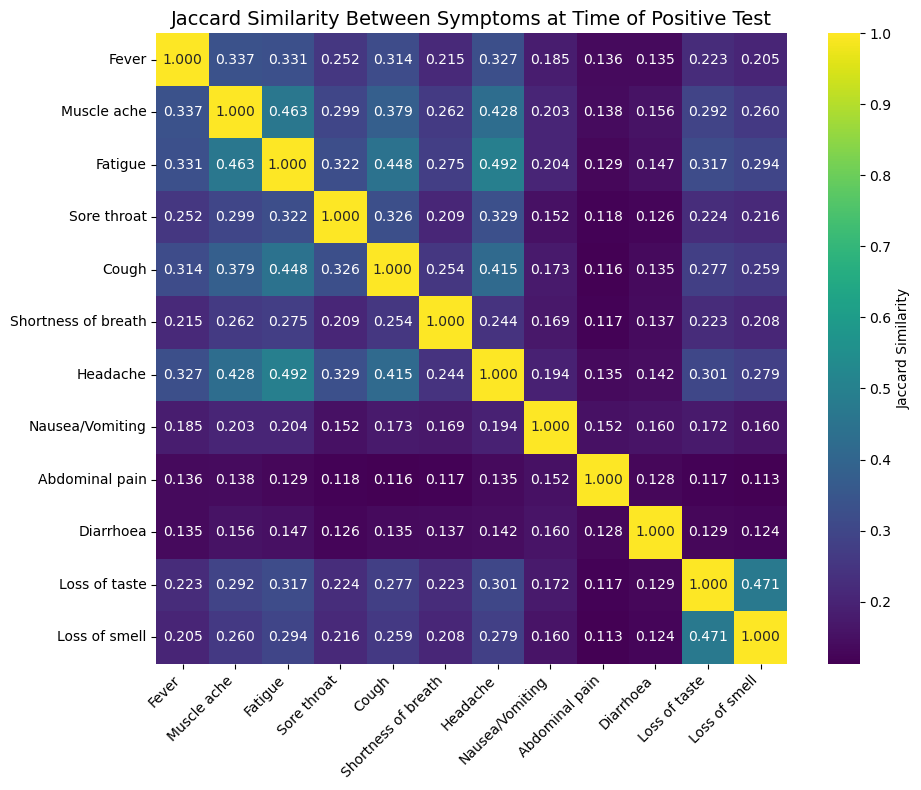

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix_t1, annot=True, fmt=".3f", cmap="viridis", square=True,
            cbar_kws={"label": "Jaccard Similarity"})
plt.title("Jaccard Similarity Between Symptoms at Time of Positive Test", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

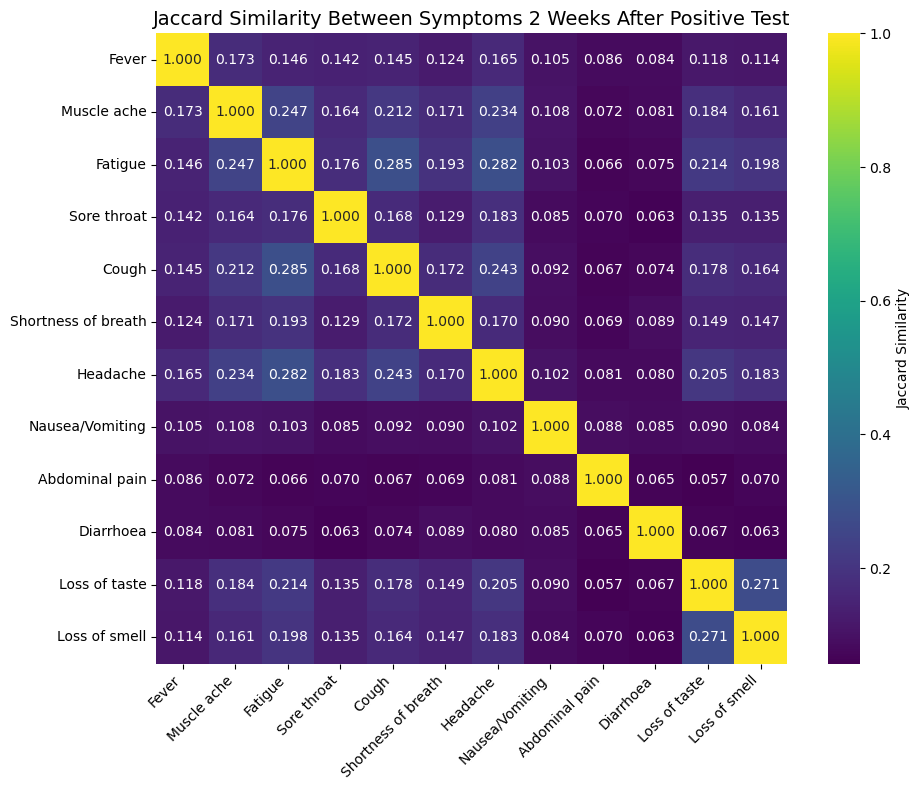

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix_t2, annot=True, fmt=".3f", cmap="viridis", square=True,
            cbar_kws={"label": "Jaccard Similarity"})
plt.title("Jaccard Similarity Between Symptoms 2 Weeks After Positive Test", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()